In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, multilabel_confusion_matrix

data = pd.read_csv("/Users/Cristian/Documents/EPN/Maestría en Computación/OneDrive - Escuela Politécnica Nacional/2022-B/Tesis/Dataset/20221215_151443_clustering.csv")
#data = pd.read_csv("F:/EPN/Maestría en Computación/OneDrive - Escuela Politécnica Nacional/2022-B/Tesis/Dataset/20221215_151443_clustering.csv")

df = data.loc[:, ['steering_angle', 'speed', 'rpm', 'throttle_position', 'engine_temperature', 'system_voltage', 'barometric_pressure',
    'distance_travelled', 'latitude', 'longitude', 'heart_rate', 'accidents_onsite', 'risk_level']]

le = LabelEncoder()
df['risk_level']= le.fit_transform(df['risk_level'])

n = len(pd.unique(df['risk_level']))

X = df.iloc[:,0:12]
Y = df.iloc[:,-1:]

undersample = NearMiss(version = 1, n_neighbors = 4)
X_res, Y_res = undersample.fit_resample(X, Y)

scaler = StandardScaler()
X = scaler.fit_transform(X_res)
Y = Y_res

In [2]:
Y = np.array(Y)

# **Hyperparameter Tuning**

In [3]:
param_grid = {
    'hidden_layer_sizes': [(120, 100, 50), (120, 80, 40), (100, 50, 30)],
    'max_iter': [1500, 3000, 5000],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.01, 0.001, 0.0001],
    'learning_rate': ['constant','adaptive'],
}
mlp_model = MLPClassifier()
grid = GridSearchCV(mlp_model, param_grid, cv = 5)
grid.fit(X, Y.flatten())

print(
	"Best parameters are {} \nScore: {}%".format(
		grid.best_params_, grid.best_score_)
)

Best parameters are {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (120, 100, 50), 'learning_rate': 'adaptive', 'max_iter': 5000, 'solver': 'adam'} 
Score: 0.8098958333333333%


# **MLP Implementation**

In [4]:
mlp_model = MLPClassifier(hidden_layer_sizes = (120, 100, 50),
                        alpha = 0.0001,
                        max_iter = 5000,
                        learning_rate = 'adaptive',
                        activation = 'relu',
                        solver = 'adam')

# **Cross Validation**

In [5]:
num_folds = 5
X = np.array(X)
Y = np.array(Y)

# Define per-fold score containers
acc_per_fold = []
specifity_per_fold = []
sensivity_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits = num_folds, shuffle = True)

------------------------------------------------------------------------
Training for fold 1 ...

              precision    recall  f1-score   support

     Class 0       0.97      0.96      0.96        95
     Class 1       0.90      0.92      0.91       114
     Class 2       0.92      0.95      0.93        82
     Class 3       0.92      0.87      0.90        93

    accuracy                           0.92       384
   macro avg       0.93      0.93      0.93       384
weighted avg       0.92      0.92      0.92       384


Score for fold 1: - Accuracy: 0.9244791666666666 - Specifity: 0.974485285488324 - Sensivity: 0.9252836556379146


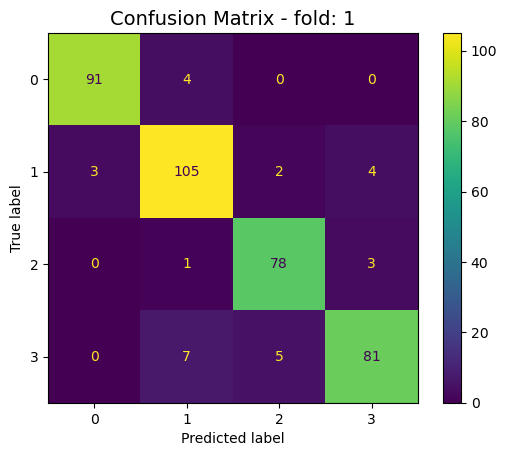

------------------------------------------------------------------------
Training for fold 2 ...

              precision    recall  f1-score   support

     Class 0       0.94      0.99      0.97       100
     Class 1       0.95      0.84      0.89       107
     Class 2       0.90      0.89      0.90        91
     Class 3       0.84      0.92      0.88        86

    accuracy                           0.91       384
   macro avg       0.91      0.91      0.91       384
weighted avg       0.91      0.91      0.91       384


Score for fold 2: - Accuracy: 0.9088541666666666 - Specifity: 0.969942600975272 - Sensivity: 0.9099590091499459


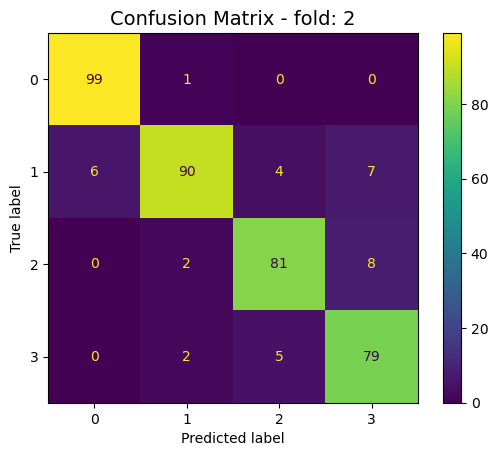

------------------------------------------------------------------------
Training for fold 3 ...

              precision    recall  f1-score   support

     Class 0       0.98      0.96      0.97        97
     Class 1       0.84      0.92      0.88        79
     Class 2       0.98      0.91      0.95       104
     Class 3       0.91      0.92      0.92       104

    accuracy                           0.93       384
   macro avg       0.93      0.93      0.93       384
weighted avg       0.93      0.93      0.93       384


Score for fold 3: - Accuracy: 0.9296875 - Specifity: 0.9769610013137603 - Sensivity: 0.929837995261948


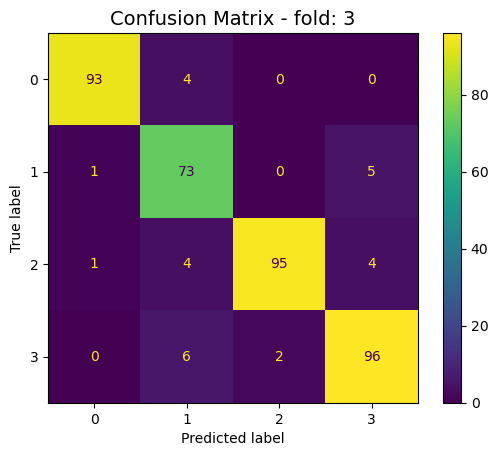

------------------------------------------------------------------------
Training for fold 4 ...

              precision    recall  f1-score   support

     Class 0       0.96      0.91      0.93        96
     Class 1       0.84      0.90      0.87        79
     Class 2       0.94      0.93      0.94       106
     Class 3       0.93      0.93      0.93       103

    accuracy                           0.92       384
   macro avg       0.92      0.92      0.92       384
weighted avg       0.92      0.92      0.92       384


Score for fold 4: - Accuracy: 0.9192708333333334 - Specifity: 0.9734289264813574 - Sensivity: 0.9177463190793974


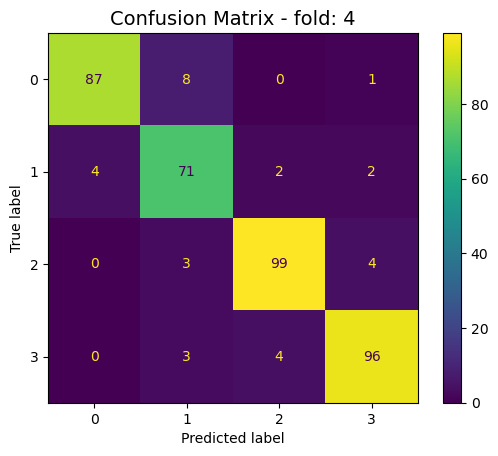

------------------------------------------------------------------------
Training for fold 5 ...

              precision    recall  f1-score   support

     Class 0       0.89      0.97      0.93        92
     Class 1       0.94      0.79      0.86       101
     Class 2       0.94      0.87      0.90        97
     Class 3       0.83      0.97      0.89        94

    accuracy                           0.90       384
   macro avg       0.90      0.90      0.90       384
weighted avg       0.90      0.90      0.89       384


Score for fold 5: - Accuracy: 0.8958333333333334 - Specifity: 0.9654305196083881 - Sensivity: 0.898383750023724


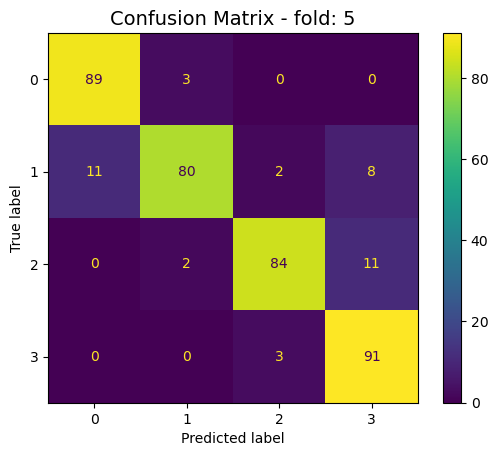

In [6]:
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(X, Y):
    
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...\n')

    # Fit data to model
    mlp_model.fit(X[train], Y[train].flatten())
    
    # Predict the labels of test set
    y_pred = mlp_model.predict(X[test])

    target_names = ["Class {}".format(i) for i in range(n)]
    print(classification_report(Y[test], y_pred, target_names = target_names, zero_division = 0))

    # Confusion Matrix
    mcm = multilabel_confusion_matrix(Y[test], y_pred)

    tn = mcm[:, 0, 0]
    tp = mcm[:, 1, 1]
    fn = mcm[:, 1, 0]
    fp = mcm[:, 0, 1]

    specifity = np.mean(tn / (tn + fp))
    sensivity = np.mean(tp / (tp + fn))

    # Generate generalization metrics of evaluation
    scores = mlp_model.score(X[test], Y[test])
    print(f'\nScore for fold {fold_no}: - Accuracy: {scores} - Specifity: {specifity} - Sensivity: {sensivity}')

    # Plot Confusion Matrix of each fold
    ConfusionMatrixDisplay.from_predictions(Y[test], y_pred)
    plt.title(f'Confusion Matrix - fold: {fold_no}', fontsize = 14)
    plt.show()
    
    acc_per_fold.append(scores)
    specifity_per_fold.append(specifity)
    sensivity_per_fold.append(sensivity)

    # Increase fold number
    fold_no = fold_no + 1

# **Resume Evaluation Metric scores**

In [7]:
# == Provide average scores ==
print('Resume scores per fold')
for i in range(0, num_folds):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Accuracy: {acc_per_fold[i]} - Specificity: {specifity_per_fold[i]} - Sensitivity: {sensivity_per_fold[i]}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)}')
print(f'> Specificity: {np.mean(specifity_per_fold)}')
print(f'> Sensitivity: {np.mean(sensivity_per_fold)}')

Resume scores per fold
------------------------------------------------------------------------
> Fold 1 - Accuracy: 0.9244791666666666 - Specificity: 0.974485285488324 - Sensitivity: 0.9252836556379146
------------------------------------------------------------------------
> Fold 2 - Accuracy: 0.9088541666666666 - Specificity: 0.969942600975272 - Sensitivity: 0.9099590091499459
------------------------------------------------------------------------
> Fold 3 - Accuracy: 0.9296875 - Specificity: 0.9769610013137603 - Sensitivity: 0.929837995261948
------------------------------------------------------------------------
> Fold 4 - Accuracy: 0.9192708333333334 - Specificity: 0.9734289264813574 - Sensitivity: 0.9177463190793974
------------------------------------------------------------------------
> Fold 5 - Accuracy: 0.8958333333333334 - Specificity: 0.9654305196083881 - Sensitivity: 0.898383750023724
------------------------------------------------------------------------
Average scor